In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [13]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('phi_jet')
    scalar.append('phi_photon')
    scalar.append('pt_jet')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [14]:
file1 = ["$HOME/EIC/output/102.root"]
a = getData(file1)
file2 = ["$HOME/EIC/output/1226.root"]
b = getData(file2)


Processed $HOME/EIC/output/102.root in 43.9 seconds

Processed $HOME/EIC/output/1226.root in 34.2 seconds


In [23]:
a1 = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
a1 = applyCut(a1, 'pt_jet > 4', 'pt_jet > 4')
#a1 = applyCut(a1, 'Q2 > 25', 'Q2 > 25')
a1 = keepOneJet(a1)
#a1 = fixPhi(a1, 'photon')
#a1 = applyCut(a1, 'delta_phi_photon_abs < 0.4','delta_phi_photon_abs < 0.4')

b1 = applyCut(b, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
b1 = applyCut(b1, 'pt_jet > 4', 'pt_jet > 4')
#b1 = applyCut(b1, 'Q2 > 25', 'Q2 > 25')
b1 = keepOneJet(b1)
#b1 = fixPhi(b1, 'photon')
#b1 = applyCut(b1, 'delta_phi_photon_abs < 0.4','delta_phi_photon_abs < 0.4')

0.1 < y < 0.85 6783540  fraction kept: 18.7
pt_jet > 4 259588  fraction kept: 3.8

Remove extra jets 220372  fraction kept: 84.9
0.1 < y < 0.85 5699421  fraction kept: 16.5
pt_jet > 4 302234  fraction kept: 5.3

Remove extra jets 260458  fraction kept: 86.2


In [24]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xseca = np.mean(a['xsec'])
ntrialsa = a['ntrials'][a.shape[0]-1]
xa, ya, xerr = getHist(a1, 'pt_jet', xvar_array)

In [25]:
xsecb = np.mean(b['xsec'])
ntrialsb = b['ntrials'][b.shape[0]-1]
xb, yb, xerr = getHist(b1, 'pt_jet', xvar_array)

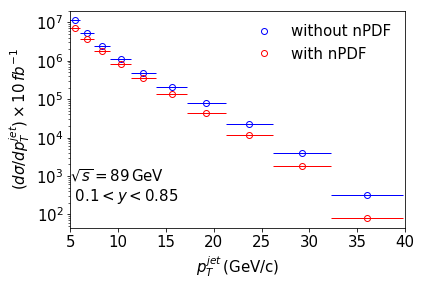

In [26]:
plt.errorbar(xa, 10*ya*xseca*1e12/(2*ntrialsa*xerr), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(xa, 10*ya*xseca*1e12/(2*ntrialsa*xerr), 'bo', fillstyle='none', label='without nPDF')
plt.errorbar(xb, 10*yb*xsecb*1e12/(2*ntrialsb*xerr), xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(xb, 10*yb*xsecb*1e12/(2*ntrialsb*xerr), 'ro', fillstyle='none', label='with nPDF')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T^{jet} \, (\mathrm{GeV/c})$', fontsize=15)
plt.ylabel(r'$(d\sigma/dp_T^{jet}) \times 10 \, fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(5,2e2,'$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$',\
        fontsize=15)
plt.savefig('images/nPDF.pdf', bbox_inches='tight')

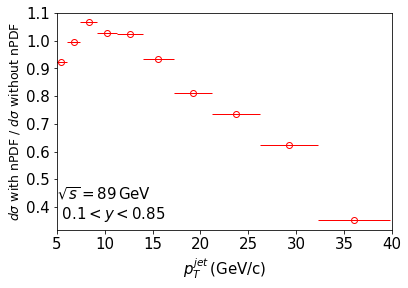

In [29]:
plt.errorbar(xb, yb*xsecb/(ya*xseca), xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(xb, yb*xsecb/(ya*xseca), 'ro', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T^{jet} \, (\mathrm{GeV/c})$', fontsize=15)
plt.ylabel(r'$d\sigma$ with nPDF / $d\sigma$ without nPDF', fontsize=12.5)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(5,0.35,'$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$',\
        fontsize=15)
plt.savefig('images/nPDF_ratio.pdf', bbox_inches='tight')